In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from colormap import rgb2hex

In [2]:
img_path = 'img3.jpg'
no_cluster = 50
n_init_cluster = 100

In [3]:
def img_converter(path=''):
    if path=='':
        print('insert file path!')
        return
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((img.shape[0]*img.shape[1], 3))
    
    return img

In [4]:
def clustering(img, k=3, n_init=10):
    clt = KMeans(n_clusters=k, n_init=n_init)
    clt.fit(img)
    
    num_labels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=num_labels)
    hist = hist.astype('float')
    hist /= hist.sum()
    
    return hist, clt.cluster_centers_

In [5]:
def sort_by_ratio(ratio_, center_):
    stacked_arr = np.hstack((ratio_.reshape(-1, 1), center_))
    sorted_values_df = pd.DataFrame(stacked_arr, columns=['ratio', 'r', 'g', 'b']).sort_values('ratio', ascending=False)
    sorted_ratio_ = sorted_values_df.values[:, :1].reshape(-1)
    sorted_rgb_ = sorted_values_df.values[:, 1:]
    
    return sorted_ratio_, sorted_rgb_

In [6]:
def make_bar_all_color(values):
    bar = np.zeros((25, 80, 3), dtype='uint8')
    start_x = 0
    
    for color in values:
        end_x = start_x + (bar.shape[1]/values.shape[0])
        cv2.rectangle(bar, (int(start_x), 0), (int(end_x), bar.shape[0]),
                     color.astype('uint8').tolist(), -1)
        start_x = end_x
    
    return bar

In [7]:
def make_bar_representitive_color(value):
    bar = np.zeros((5, 5, 3), dtype='uint8')
    
    cv2.rectangle(bar, (0, 0), (bar.shape[1], bar.shape[1]),
                 value, -1)
    
    return bar

In [8]:
def color_show(box, x=10, y=50):
    plt.figure(figsize=(x, y))
    plt.axis('off')
    plt.imshow(box)
    plt.show()

In [9]:
def ratio_show(values):
    for idx, value in enumerate(values*100):
        if idx==(len(values)-1):
            print('{:.2f}%'.format(value), end='')
        else:
            print('{:.2f}%'.format(value), end=' / ')

In [10]:
def make_representitive_color(ratios_, rgbs_):
    percent_under1 = []
    for value in ratios_:
        percent_under1.append(float('{:.3f}'.format(value)))
    
    r_ele = []
    for value, percent in zip(rgbs_.astype('uint8')[:,:1].reshape(-1), percent_under1):
        r_ele.append(value*percent)
    g_ele = []
    for value, percent in zip(rgbs_.astype('uint8')[:,1:2].reshape(-1), percent_under1):
        g_ele.append(value*percent)
    b_ele = []
    for value, percent in zip(rgbs_.astype('uint8')[:,2:3].reshape(-1), percent_under1):
        b_ele.append(value*percent)
    rgb_rep_color = (int(sum(r_ele)), int(sum(g_ele)), int(sum(b_ele)))
    
    return rgb_rep_color, rgb2hex(rgb_rep_color[0], rgb_rep_color[1], rgb_rep_color[2])

In [11]:
image = img_converter(img_path)

In [12]:
%time color_ratio, cluster_center = clustering(image, k=no_cluster, n_init=n_init_cluster)

Wall time: 9min 37s


In [13]:
sorted_ratio, sorted_rgb = sort_by_ratio(color_ratio, cluster_center)

In [14]:
box_all = make_bar_all_color(sorted_rgb)

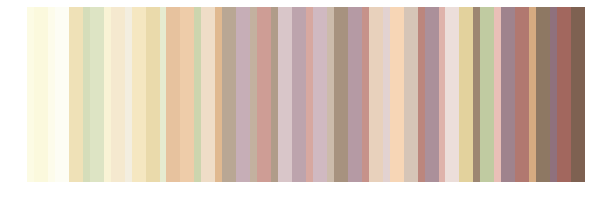

9.53% / 8.10% / 7.08% / 4.79% / 2.69% / 2.68% / 2.61% / 2.56% / 2.51% / 2.44% / 2.37% / 2.30% / 2.13% / 2.12% / 2.01% / 1.98% / 1.77% / 1.72% / 1.64% / 1.59% / 1.58% / 1.56% / 1.50% / 1.49% / 1.49% / 1.49% / 1.46% / 1.45% / 1.42% / 1.40% / 1.37% / 1.36% / 1.35% / 1.32% / 1.30% / 1.28% / 1.28% / 1.25% / 1.22% / 1.22% / 1.10% / 1.06% / 0.96% / 0.95% / 0.86% / 0.79% / 0.67% / 0.48% / 0.41% / 0.31%

(None, None)

In [15]:
color_show(box_all), ratio_show(sorted_ratio)

In [16]:
rep_color, rep_code = make_representitive_color(sorted_ratio, sorted_rgb)

In [17]:
box_rep = make_bar_representitive_color(rep_color)

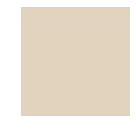

('#E2D3BE', (226, 211, 190))

In [18]:
color_show(box_rep, 2, 2)
rep_code, rep_color